In [1]:

# Run This First
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# **Intro Python and Single Neuron Models**
Before starting **save a copy of this notebook in your own drive**. This way you can edit.
In today's section we're going to review different python methods for computing functions and the basics of using jupyter notebooks. We will apply these skills to build and plot our first neuronal models using differential equations.

## **Jupyter Notebooks**
Many of your resources will include jupyter notebooks. These documents are comprised of cells with code and text. The code will all be in python and we'll be using basic modules such as numpy for this lab.

*   Run a Cell: Shift + Enter
*  Edit a Cell: Double Click

When you run a cell the last expression written will be evaluated and printed below the cell. If a value is explicitly print this will also show up under the cell after it is run.



### Numpy
A NumPy array is the same as a list but arithmetic operations on NumPy arrays correspond to elementwise operations. Basically, numpy is a library that makes our lives easier when working with groups of data and we will use it often. 

Important functions:

- `.shape` returns the dimensions of the array.

- `.ndim` returns the number of dimensions. 

- `.size` returns the number of entries in the array.

- `len()` returns the first dimension.


To use functions in NumPy, we have to import NumPy to our workspace. This is done by the command `import numpy`. By convention, we rename `numpy` as `np` for convenience.

In [2]:
# by convention, import numpy as np
import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])

print(x)

[[1 2 3]
 [4 5 6]]


In [3]:
print("Number of Dimensions:", x.ndim)

Number of Dimensions: 2


In [4]:
print("Dimensions:", x.shape)

Dimensions: (2, 3)


In [5]:
a = np.array([1, 2, 3])

print("a = ", a)

# elementwise arithmetic
print("a * a = ", a * a)

a =  [1 2 3]
a * a =  [1 4 9]


In [6]:
b = np.array(np.ones((3, 3))) * 2
print("b =\n", b)
c = np.array(np.ones((3, 3)))
print("c =\n", c)

b =
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]
c =
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


Element Wise Operations

You can subtract add and do other basic operations element wise on numpy arrays using a simple operator.


In [7]:
print("b * c =\n", b * c)

b * c =
 [[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


Matrix Multiplication

For matrix multiplications or dot products use the dot operator

In [8]:
print("b * c =\n", np.dot(b, c))

b * c =
 [[6. 6. 6.]
 [6. 6. 6.]
 [6. 6. 6.]]


## **Biological Neuron Simulations**
When attempting to understand the function of neurons, it is integral to have a good understanding of **Action Potentials**. In this notebook we will model the biological structures involved in an action potential as basic circuit components. We do this to derive a function that will fully simulate the potential of a spiking neuron.

### Action Potential Biology
The neuron membrane is a complex structure but there are really three key components that we must include in our model to best simulate a spike. The membrane includes:

*   Ion Channels
*   Ion Pumps

As discussed in the paper, these components alone are enough to classify the neuronal model as a detailed model. These kinds fof representative models are often harder to quantify and observe, but that is why this tool is so important.

Using these main components and the membrane itself that holds charge due to the ion differential, we can create a rough circuit simulation using these three components where:

*   Ion Channels = Resistors
*   Pumps (Resting Charge Gradient) = Batteries
*   Membrane Charge = Capacitors
 

In our model, the voltage across the membrane is modeled by how easy it is for ions to move across the membrane channels (Resistors) and the resting gradient that the pumps create (Battery) while the membrane itself is an insulating material with a differential of charge on either side (Capacitor).

![circuit](http://umdberg.pbworks.com/f/1593196173/Ex2P1f1.jpg)

This circuit is an **RC Circuit** and is a very basic circuit type with a simple analysis. The intuition behind any RC circuit includes a **time constant** and a **equilibrium state**. Lets take a single ion channel and the membrane capacitor. The equation below then models the voltage across the membrane due to sodium ion movement. The current value **I** mentioned is an input current simulating a excitatory input to the membrane. 

$$C\frac{dV}{dt} = \frac{-(V - V_{Na})}{R_{Na}} + I_{ext}$$

The **equilibrium state** of our circuit would be the equilibrium voltage created by sodium ions pumps added to the volage across the resistor due to current. However with the absence of such a current we derive just the equilibrium potential of sodium.
$$V_{Na} + R_{Na}I_{ext}$$
**When the circuit is in rest (extended usage or no usage), the voltage across the membrane approaches this equilibrium state.**

The **time constant** is a rate that describes how fast the voltage changes to reach this equilibrium state when it is not in equilibrium. **A smaller time constant means that it is easier for ions to travel across the membrane so the voltage changes faster**
$$\tau = R_{Na}C$$

 Using differential equations we can solve for the voltage across the membrane. This model however doesn't include a spike which will come from the **voltage gated channels** we talked about. We will use Euler approximations on the above differential to draw an approximate discrete time interval graph of the voltage.

 **Play around with different input traces and other parameters of the model below**


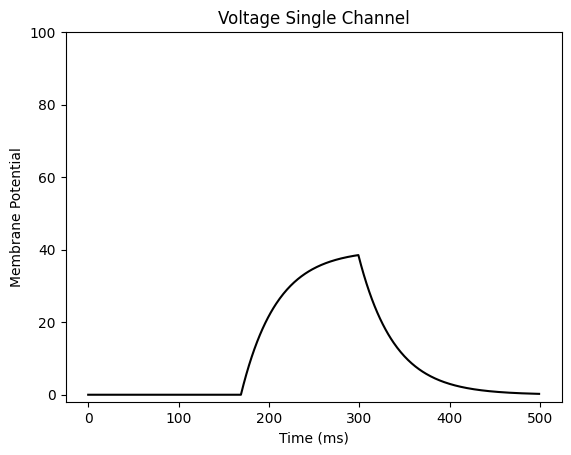

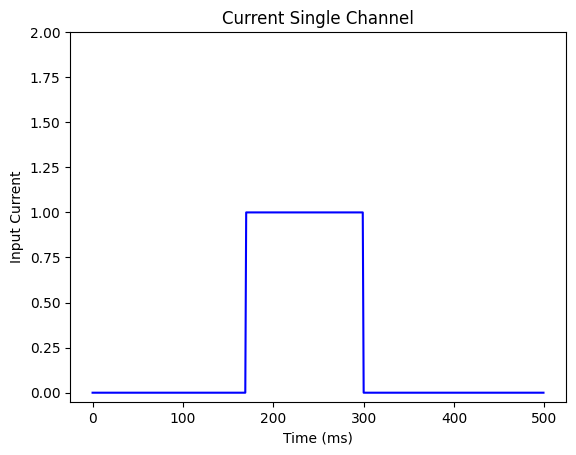

In [9]:
# model parameters
r_na = 40   # (Mohm)
c = 1.0  # (nF)
tau = r_na*c  # time constant (ms)
v_na = 0  # equilibrium potential (mV)
dt = 1.0  # simulation time step (ms)

max_t  = 500  # Simulation time (ms)
t = np.arange(0,max_t,dt)

# input current trace 
i_max = 1.0
i_trace = np.zeros(len(t))
i_trace[170:300] = i_max

# Euler solution
v = np.zeros(len(i_trace))
v[0] = 0
for i in range(1,len(i_trace)):
    dv = (-(v[i-1] - v_na) + r_na*i_trace[i])/tau
    v[i] = v[i-1] + dv*dt

# voltage trace
plt.plot(v,'k')
plt.ylim(top=100)
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential')
plt.title('Voltage Single Channel')
plt.show()

# input current trace
plt.plot(i_trace,'b')
plt.ylim(top=2.0)
plt.xlabel('Time (ms)')
plt.ylabel('Input Current')
plt.title('Current Single Channel')
plt.show()

### Voltage Gated Channels
To simulate a spike we have to add a key detail into our model that allows for our neuron voltage pattern to spike after reaching a certain threshold. The key here is carefully calibrated **voltage gated channels**. These channels propoagate the action potetional down the axon by allowing ion flow when certain potential thresholds are reached.

From the model above we used resistors to represent ion channels. A voltage gated channel therefore changes properties of this **resistor** based on the voltage.

#### Hodgkin-Huxley Model
The Hodgkin-Huxley is a popular neuronal model that uses the ideas we developed. The model contains a leakage channel and channels for sodium (Na) and potassium (K). These three channels are in parrallel each with its own battery (equilibrium potential) for that specific type of ion.

The main difference is that the sodium and potassium channels are open with different **probabilities**.

For potassium channels we can define a channel have 4 sub parts that all must be open for the channel to allow passage. The probability a sub part is open is defined as **n** therefore
$$ P(K) \sim n^4$$
Or the probability a certain channel is open. Using this idea and the law of large numbers we can think of this value as the proportion of channels open. So where does the voltage come in to play? 

This **n** value is actually defined by another **differential** of two rate functions that define transitions in states for different voltages.

$$\frac{dn}{dt} = \alpha_n(V)(1-n) - \beta_n(V)(n)$$

Alpha describes transitions from on to off and beta is off to on (do you see why?). In whole this expression is **probabilistic model** used to describe whole population proportions (neat!). As we've seen above, open potassium channels are denoted by proportion **n**. Open sodium channels are denoted by **m** however a special **h** proportion denotes open inactivation gates. When an inactivation gate is closed ions cannot go through an open sodium gate. Using some real values lets graph these proportions.


*   n: potassium channel
*   m: sodium channel (excititory)
*   h: gate inhibition









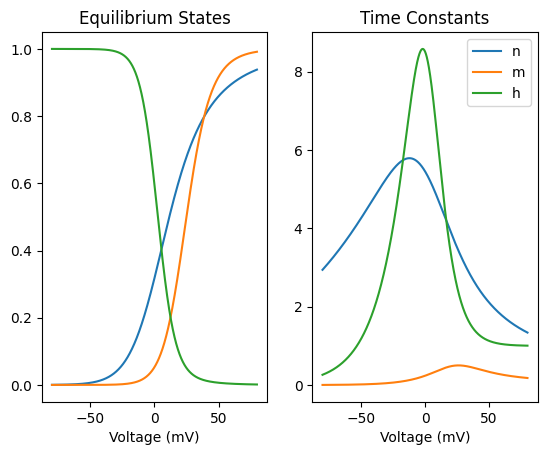

In [10]:
V = np.arange(-80.0,80,0.01)

alpha_n = (0.1 - 0.01*V)/(np.exp(1-0.1*V)-1)
alpha_m = (2.5 - 0.1*V)/(np.exp(2.5 - 0.1*V)-1)
alpha_h = 0.07*np.exp(-V/20.0)

beta_n  = 0.125*np.exp(-V/80.0)
beta_m  = 4.0*np.exp(-V/18.0)
beta_h   = 1.0/(np.exp(3 - 0.1*V) + 1)

tau_n = 1/(alpha_n + beta_n)
inf_n = alpha_n*tau_n

tau_m = 1/(alpha_m + beta_m)
inf_m = alpha_m*tau_m 

tau_h = 1/(alpha_h + beta_h)
inf_h = alpha_h*tau_h

plt.clf()
plt.subplot(1,2,1)
plt.plot(V,inf_n)
plt.plot(V,inf_m)
plt.plot(V,inf_h)
plt.title('Equilibrium States')
plt.xlabel('Voltage (mV)')
plt.subplot(1,2,2)
plt.plot(V,tau_n)
plt.plot(V,tau_m)
plt.plot(V,tau_h)
plt.title('Time Constants')
plt.xlabel('Voltage (mV)')
plt.legend(['n','m','h'])

Following the graphs a basic intution can be gained about the origin of a spike. The equilibrium voltage of the graphs above is 0.

*   As voltage increases sodium channels and potassium channels are more likely to open and sodium has a very low time constant.
*   As voltage increases sodium inactivation gates are more likely to be closed but with a high time constant making the proportion decrease slowly.
*   **Sodium gates open faster then inactivation gates close**

This means that there must be a **spike** or in other words a place where positive voltage leads to a more positive voltage that then peaks at some point to return to equilibrium.

Integrating these gates we can now compile the full HH model. Note that resistance can also be written as **1/R** which are the **g** constants in front of terms.
$$
-C_m\frac{dV}{dt} = g_L(V-V_L) + g_Kn^4(V-V_K) + g_{Na}m^3h(V-V_{Na}) - I_{ext}
$$
$$g_L = \frac{1}{R_L}$$

As you can see we have three channels bound by our proportion functions **m, n, h** and their respective equilibrium voltages and resistances.


In [11]:
# Adapted from https://neuronaldynamics.epfl.ch/online/index.html
# All values are relatively accurate
# Equilibrium potentials
V_Na = 115.0   # (mV)
V_K  = -12.0   # (mV)
V_L  = 10.6    # (mV)

# Resistance Values (Conductance)
g_Na = 120.0   # (mS)
g_K  = 36.0    # (mS)
g_L  = 0.3     # (mS)

C_m = 1.0   # nF
dt = 0.01      # [ms]
T = 40         # [ms]
t = np.arange(0,T,dt)

# Initial Parameters
V = np.zeros(len(t))
n = np.zeros(len(t))
m = np.zeros(len(t))
h = np.zeros(len(t))

# Current
I_E = 0.0

V[0] = 0.0
h[0] = 0.59
m[0] = 0.05
n[0] = 0.31

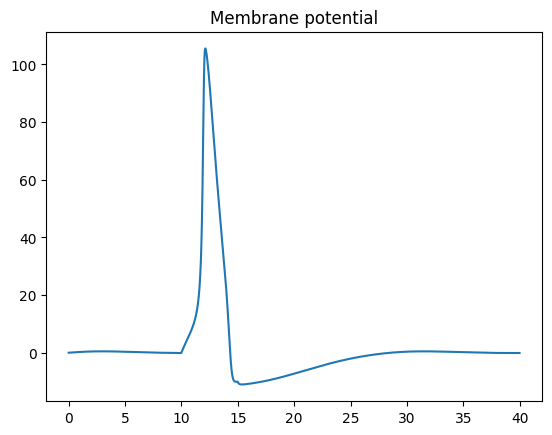

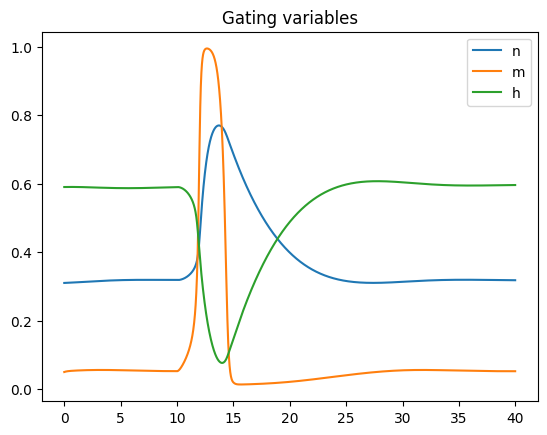

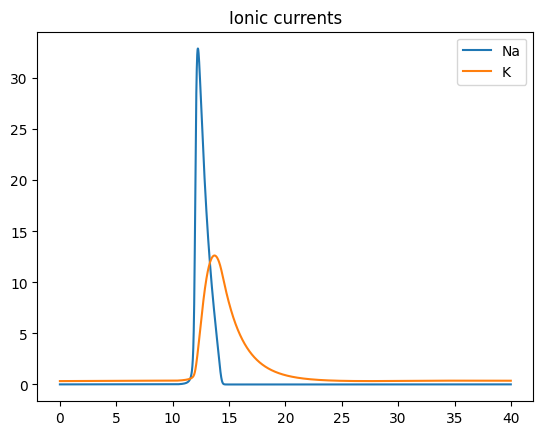

In [12]:
for i in range(1,len(t)):
    # Set Current High at 10 ms
    if i == 1000:
        I_E = 10.0
    # Set Current Low at 15 ms
    if i == 1500:
        I_E = 0.0
        
    # Alpha and Beta functions
    alpha_n = (0.1 - 0.01*V[i-1]) / ( np.exp(1   - 0.1*V[i-1]) - 1)
    alpha_m = (2.5 - 0.1 *V[i-1]) / ( np.exp(2.5 - 0.1*V[i-1]) - 1)
    alpha_h = 0.07*np.exp(-V[i-1]/20.0)
    
    beta_n = 0.125*np.exp(-V[i-1]/80.0)
    beta_m = 4.0 * np.exp(-V[i-1]/18.0)
    beta_h = 1 / ( np.exp(3 - 0.1*V[i-1]) + 1)
    
    # Time Constants and Equilibrium Values
    tau_n = 1.0/(alpha_n + beta_n)
    equ_n = alpha_n*tau_n
    
    tau_m = 1.0/(alpha_m + beta_m)
    equ_m = alpha_m*tau_m
    
    tau_h = 1.0/(alpha_h + beta_h)
    equ_h = alpha_h*tau_h
    
    # Update the channel opening probabilities    
    n[i]  = (1-dt/tau_n)*n[i-1] + (dt/tau_n)*equ_n
    m[i]  = (1-dt/tau_m)*m[i-1] + (dt/tau_m)*equ_m
    h[i]  = (1-dt/tau_h)*h[i-1] + (dt/tau_h)*equ_h

    # Update the membrane potential equation
    I_Na = g_Na*(m[i]**3)*h[i]  * (V[i-1]-V_Na)
    I_K  = g_K *(n[i]**4)       * (V[i-1]-V_K)
    I_L  = g_L                  * (V[i-1]-V_L)
    
    dv = -C_m*(I_Na + I_K + I_L - I_E)
    V[i]  = V[i-1] + dv*dt
    
plt.plot(t,V)
plt.title('Membrane potential')
plt.show()

plt.plot(t,n)
plt.plot(t,m)
plt.plot(t,h)
plt.title('Gating variables')
plt.legend(['n','m','h'])
plt.show()

plt.plot(t,g_Na*h * m**3)
plt.plot(t,g_K*n**4)
plt.title('Ionic currents')
plt.legend(['Na','K'])
plt.show()


## Integrate and Fire
The HH is a very detailed model but lots of time we only want a simple model that relatively closely models what we are trying to mimic.

The following model roughly approximates the sphape of a neuron firing with some extra additions need to reach a peak.
$$R*C \frac{dv}{dt} = -(V - V_{eq}) + RI(t)$$
$$\tau = R*C$$

More importantly the model is not finished. We still need the thresholding behavior therefore we define $V_{thres}$ as the potential to fire at, $V_{max}$ as firing max voltage and $V_{reset}$ as the reset voltage after firing.

Finally, the $I(t)$ in the system represents then input current to the system. This includes inhibitory and exitatory signals to the system. We can play around with this input to model networks of neurons.



In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


R = 40.0  # Mohm
C = 1.0   # nF
tau = R*C # Membrane time constant

V_thres    = -50.0  # Threshold potential (mV)
V_max      =  40.0 # Spike potential     (mV)
V_reset    = -70.0 # Reset potential     (mV)
V_eq       = -60.0 # Resting potential   (mV)
max_refrac = 3     # Steps in refractory period

dt = 1 # Time step (ms)
t = np.arange(0,500,dt) # Time
V_trace = np.zeros(len(t)) # Voltage(mV)
V_trace[0] = V_eq

# define a current trace 
I_max = 1
I_trace = np.zeros(len(t))
I_trace[100:500] = I_max


With these parameters we can now run a simulation. The current trace above is our input runs from

Text(0.5, 1.0, 'Integrate and Fire neuron')

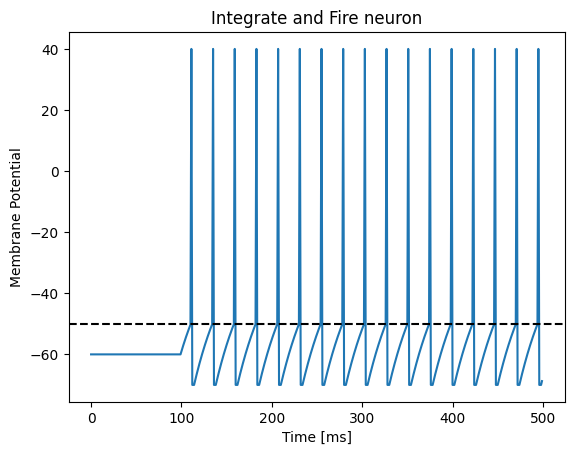

In [14]:
refrac = 0  # If larger than 0, the neuron is in the refractory period
for i in range(1,len(t)):
    # 1. Check if the neuron is in the refractory period
    if refrac > 0:
        V_trace[i] = V_reset
        refrac -= 1
        continue
    
    # 2. Update the membrane potential
    V  = V_trace[i-1]
    dv = (-(V - V_eq) + R*I_trace[i])/tau
    V_trace[i] = V + dv*dt
    
    # 3. Check for spikes
    if V_trace[i] > V_thres:
        V_trace[i] = V_max
        refrac = max_refrac

plt.plot(t,V_trace)
plt.axhline(V_thres,linestyle = '--',color='k')
plt.gca().set(xlabel='Time [ms]',ylabel='Membrane Potential')
plt.title('Integrate and Fire neuron')

### **Conceptual Questions**
1. Describe the key parts of a neuronal membrane that were touched upon in this notebook and roughly describe their circuit component equivalents.
2. Describe how spikes occur due to changes in the **m, n and h** proportion parameters. 
3. In the "integrate and fire" section, what happens if you increase the threshold value from -50 to 10 in the code block? Why does this happen?

Answer Here: https://forms.gle/4yGQCDVwyGcD56Q3A

You are all done!